## Introduction

* The heart attack prediction dataset is a comprehensive compilation of various health parameters, encompassing clinical and demographic attributes of individuals. Featuring essential factors like age, gender, cholesterol levels, and blood pressure measurements, this dataset serves as a valuable resource for understanding the potential risk factors associated with cardiac issues. With a focus on predicting the likelihood of a heart attack occurrence, this dataset enables exploratory analysis and predictive modeling, aiming to unveil critical insights into cardiovascular health and enhance preventive healthcare strategies.

## Importing  Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

* import pandas as pd: Pandas is a data manipulation library in Python, and here it is imported with the alias "pd" for convenient usage.
* import numpy as np: NumPy is a numerical computing library in Python, and it is imported with the alias "np" for easier reference in code.
* import warnings: The warnings module provides a way to handle warnings during code execution.
* warnings.filterwarnings('ignore'): This line suppresses warning messages, which can be useful to enhance code readability by avoiding the display of non-critical warnings.
* import matplotlib.pyplot as plt: Matplotlib is a 2D plotting library for Python, and here it is imported with the alias "plt" for creating visualizations.
* import seaborn as sns: Seaborn is a statistical data visualization library based on Matplotlib, and it provides a high-level interface for drawing attractive and informative statistical graphics. It is imported with the alias "sns" for easier use in code.

## Loading the Dataset

In [3]:
data = pd.read_csv('heart.csv')  

## Data Overview

In [4]:
print("Data Overview:")
print(data.head())
print(data.info())

Data Overview:
   age  sex  cp  trtbps  chol  fbs  restecg  thalach  exng  oldpeak  slp  caa  \
0   63    0   3     145   233    1        0      150     0      2.3    0    0   
1   37    0   2     130   250    0        1      187     0      3.5    0    0   
2   41    1   1     130   204    0        0      172     0      1.4    2    0   
3   56    0   1     120   236    0        1      178     0      0.8    2    0   
4   57    1   0     120   354    0        1      163     1      0.6    2    0   

   thall  output  
0      1       1  
1      2       1  
2      2       1  
3      2       1  
4      2       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    int64  
 1   sex      303 non-null    int64  
 2   cp       303 non-null    int64  
 3   trtbps   303 non-null    int64  
 4   chol     303 non-null    int64  
 5   fbs     

## Descriptive Statistics

In [5]:
print("\nDescriptive Statistics:")
print(data.describe())


Descriptive Statistics:
              age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.316832    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    0.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
st

# Data Cleaning

## Check for missing values in each column

In [6]:
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
age        0
sex        0
cp         0
trtbps     0
chol       0
fbs        0
restecg    0
thalach    0
exng       0
oldpeak    0
slp        0
caa        0
thall      0
output     0
dtype: int64


## Handling Duplicates

In [7]:
duplicate_rows = data[data.duplicated()]
print("\nDuplicate Rows:")
print(duplicate_rows)


Duplicate Rows:
     age  sex  cp  trtbps  chol  fbs  restecg  thalach  exng  oldpeak  slp  \
164   38    0   2     138   175    0        1      173     0      0.0    2   

     caa  thall  output  
164    4      2       1  


In [8]:
data = data.drop_duplicates()  # Drop duplicates

## Handling incosistent Data

In [9]:
inconsistent_data = data[(data['age'] <= 0) | (data['trtbps'] <= 0) | (data['chol'] <= 0) | (data['thalach'] <= 0)]
print("\nInconsistent Data:")
print(inconsistent_data)

data = data[~((data['age'] <= 0) | (data['trtbps'] <= 0) | (data['chol'] <= 0) | (data['thalach'] <= 0))]



Inconsistent Data:
Empty DataFrame
Columns: [age, sex, cp, trtbps, chol, fbs, restecg, thalach, exng, oldpeak, slp, caa, thall, output]
Index: []


## Handling outliers using Z-Score Method

In [10]:
from scipy.stats import zscore

z_scores = zscore(data[['age', 'trtbps', 'chol', 'thalach']])
outliers = (z_scores > 3).any(axis=1) | (z_scores < -3).any(axis=1)

print("\nOutliers:")
print(data[outliers])

data = data[~outliers]


Outliers:
     age  sex  cp  trtbps  chol  fbs  restecg  thalach  exng  oldpeak  slp  \
28    65    1   2     140   417    1        0      157     0      0.8    2   
85    67    1   2     115   564    0        0      160     0      1.6    1   
220   63    1   0     150   407    0        0      154     0      4.0    1   
223   56    1   0     200   288    1        0      133     1      4.0    0   
246   56    1   0     134   409    0        0      150     1      1.9    1   
248   54    0   1     192   283    0        0      195     0      0.0    2   
272   67    0   0     120   237    0        1       71     0      1.0    1   

     caa  thall  output  
28     1      2       1  
85     0      3       1  
220    3      3       0  
223    2      3       0  
246    2      3       0  
248    1      3       0  
272    0      2       0  


## Verifying Cleaned Data

In [11]:
print("\nCleaned Data Overview:")
print(data.head())
print(data.info())


Cleaned Data Overview:
   age  sex  cp  trtbps  chol  fbs  restecg  thalach  exng  oldpeak  slp  caa  \
0   63    0   3     145   233    1        0      150     0      2.3    0    0   
1   37    0   2     130   250    0        1      187     0      3.5    0    0   
2   41    1   1     130   204    0        0      172     0      1.4    2    0   
3   56    0   1     120   236    0        1      178     0      0.8    2    0   
4   57    1   0     120   354    0        1      163     1      0.6    2    0   

   thall  output  
0      1       1  
1      2       1  
2      2       1  
3      2       1  
4      2       1  
<class 'pandas.core.frame.DataFrame'>
Index: 295 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      295 non-null    int64  
 1   sex      295 non-null    int64  
 2   cp       295 non-null    int64  
 3   trtbps   295 non-null    int64  
 4   chol     295 non-null    int64  
 5   fbs 

# Data Visualization

## Univariate Analysis

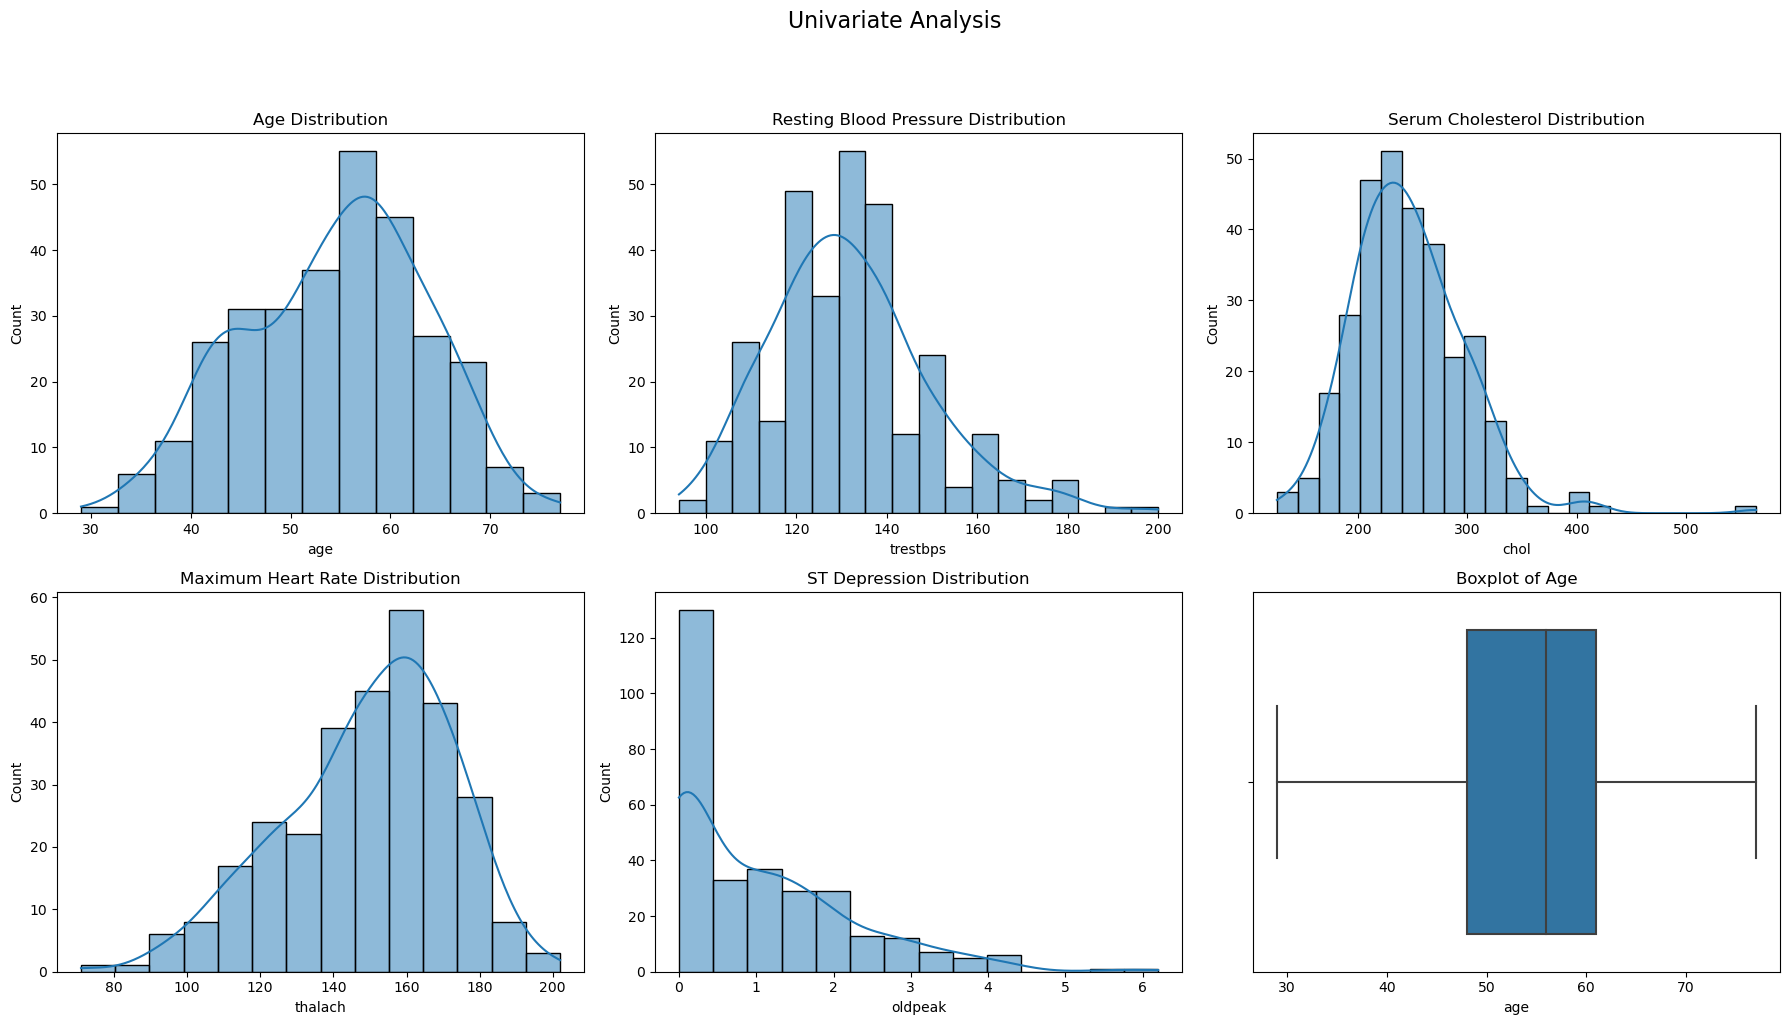

In [40]:
# Univariate Analysis

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle("Univariate Analysis", y=1.02, size=16)

# Plot 1: Age distribution
sns.histplot(data['age'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

# Plot 2: Resting Blood Pressure distribution
sns.histplot(data['trestbps'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Resting Blood Pressure Distribution')

# Plot 3: Serum Cholesterol distribution
sns.histplot(data['chol'], kde=True, ax=axes[0, 2])
axes[0, 2].set_title('Serum Cholesterol Distribution')

# Plot 4: Maximum Heart Rate distribution
sns.histplot(data['thalach'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Maximum Heart Rate Distribution')

# Plot 5: ST Depression induced by exercise distribution
sns.histplot(data['oldpeak'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('ST Depression Distribution')

# Plot 6: Boxplot of Age
sns.boxplot(x=data['age'], ax=axes[1, 2])
axes[1, 2].set_title('Boxplot of Age')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


## Bivariate Analysis

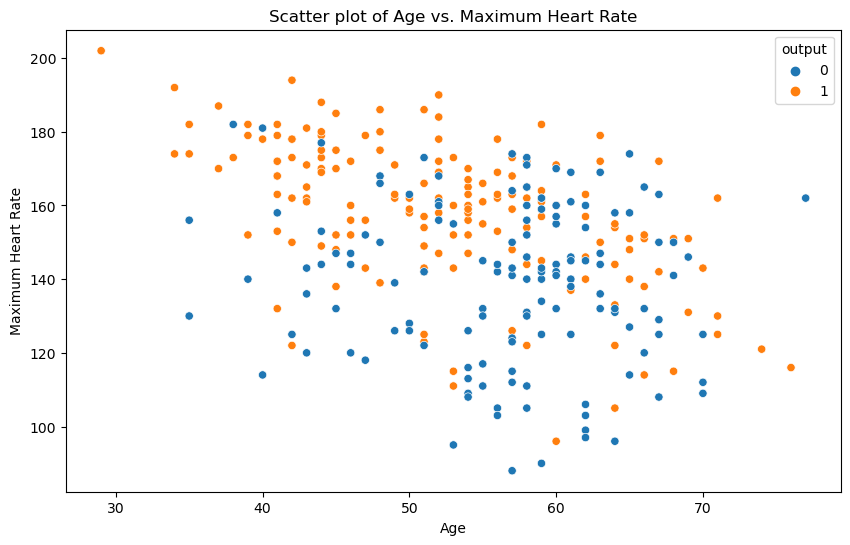

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='thalach', hue='output', data=data)
plt.title('Scatter plot of Age vs. Maximum Heart Rate')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.show()


* Histogram of Cholestrol Levels 

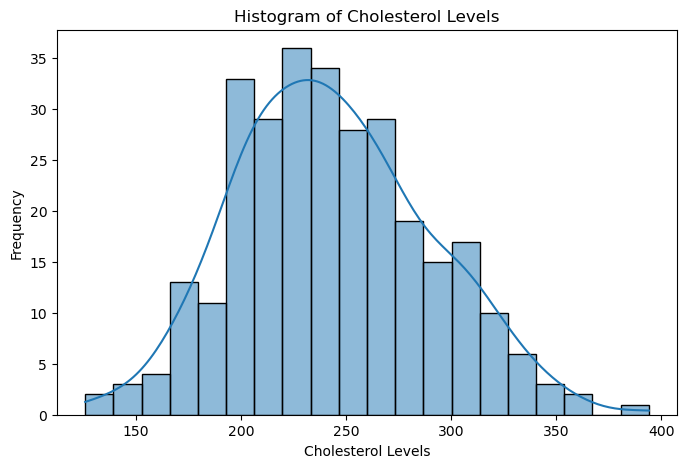

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(data['chol'], bins=20, kde=True)
plt.title('Histogram of Cholesterol Levels')
plt.xlabel('Cholesterol Levels')
plt.ylabel('Frequency')
plt.show()

* Bar plot of Sex vs. Heart Disease Presence 

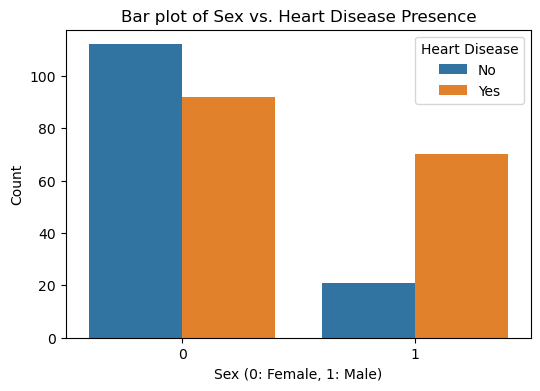

In [14]:
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', hue='output', data=data)
plt.title('Bar plot of Sex vs. Heart Disease Presence')
plt.xlabel('Sex (0: Female, 1: Male)')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

* Box Plots for Numeric vs. Categorical Columns

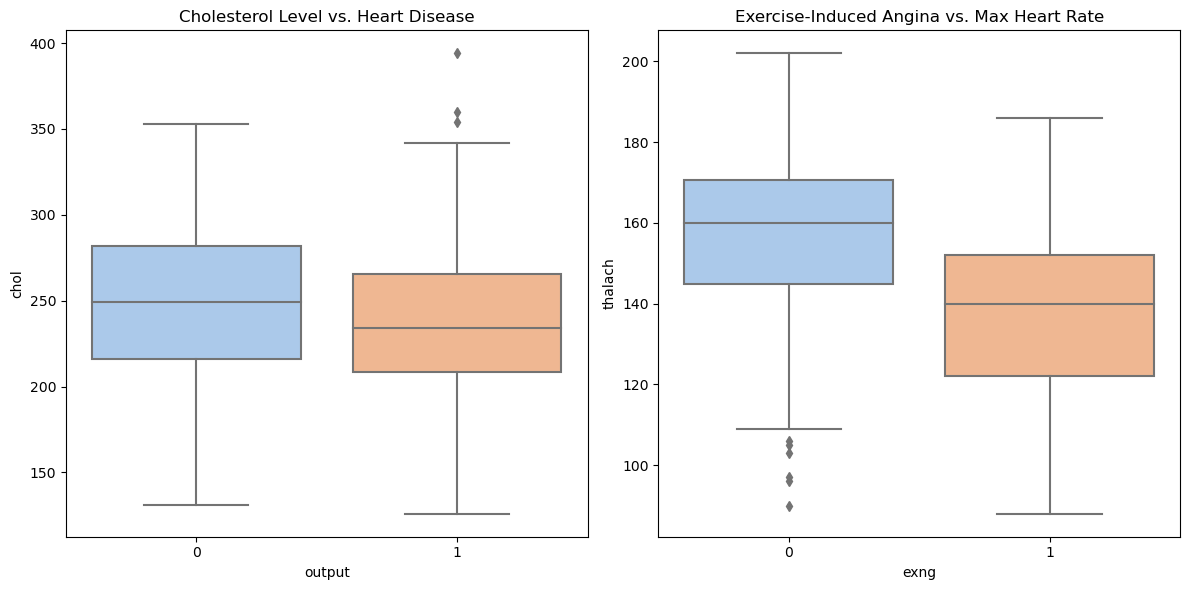

In [15]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x="output", y="chol", data=data, palette="pastel")
plt.title("Cholesterol Level vs. Heart Disease")

plt.subplot(1, 2, 2)
sns.boxplot(x="exng", y="thalach", data=data, palette="pastel")
plt.title("Exercise-Induced Angina vs. Max Heart Rate")
plt.tight_layout()
plt.show()

# Multivariate Analysis

* Pairwise Scatter Plot for Numeric Columns

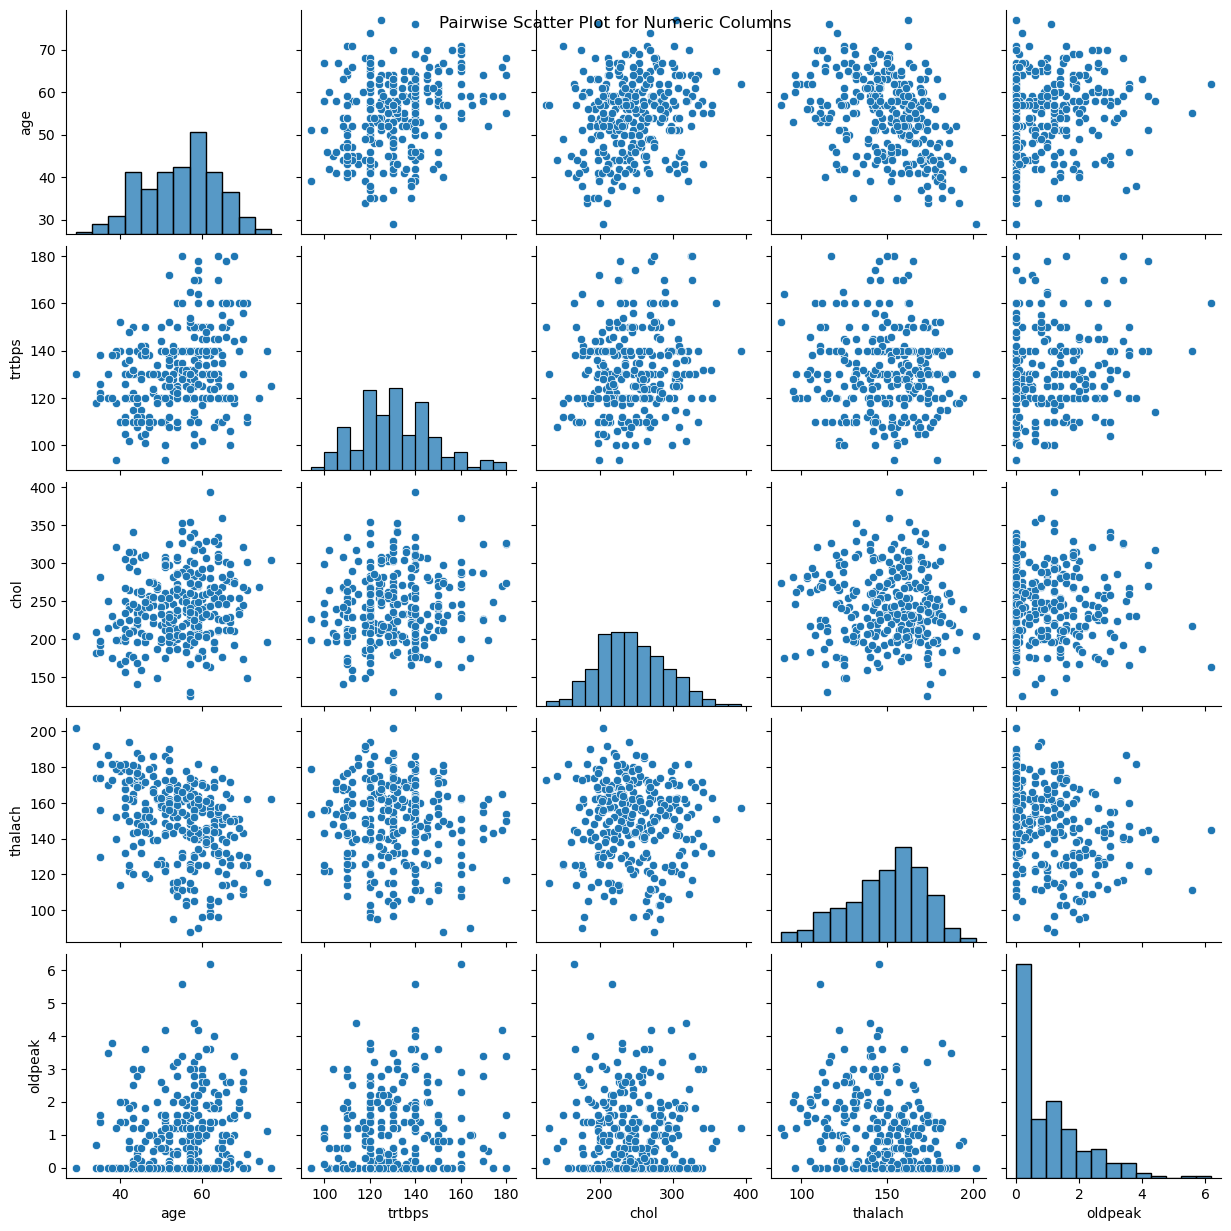

In [16]:
sns.pairplot(data, vars=["age", "trtbps", "chol", "thalach", "oldpeak"])
plt.suptitle("Pairwise Scatter Plot for Numeric Columns")
plt.show()

 * Violin Plots for Categorical vs. Numeric Columns

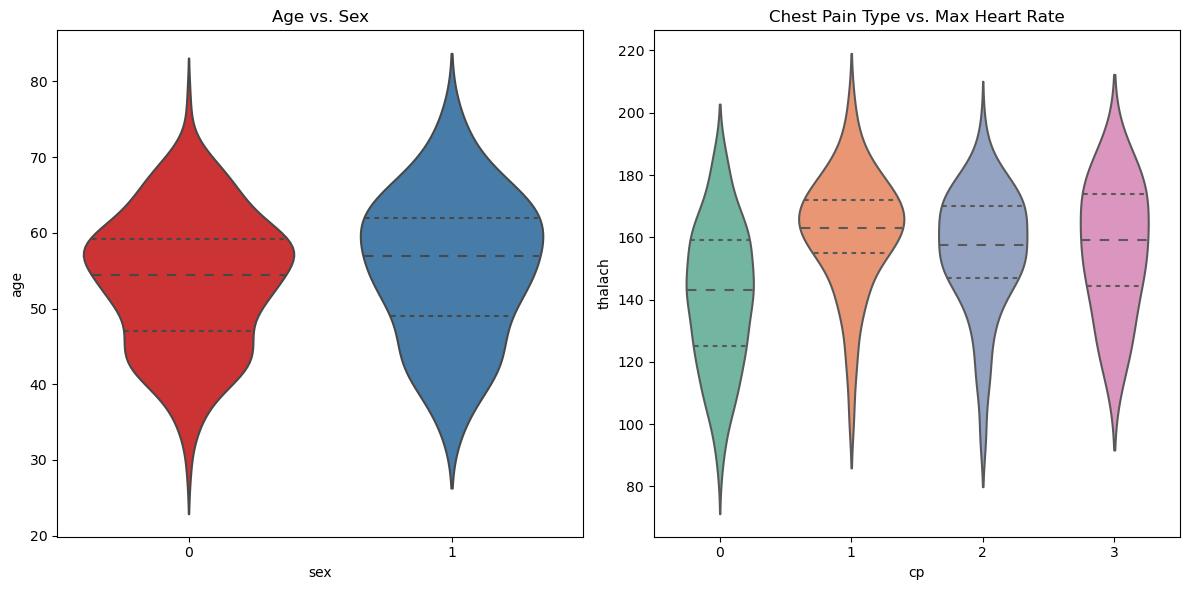

In [17]:

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.violinplot(x="sex", y="age", data=data, split=True, inner="quart", palette="Set1")
plt.title("Age vs. Sex")

plt.subplot(1, 2, 2)
sns.violinplot(x="cp", y="thalach", data=data, split=True, inner="quart", palette="Set2")
plt.title("Chest Pain Type vs. Max Heart Rate")
plt.tight_layout()
plt.show()


## Correlation Analysis

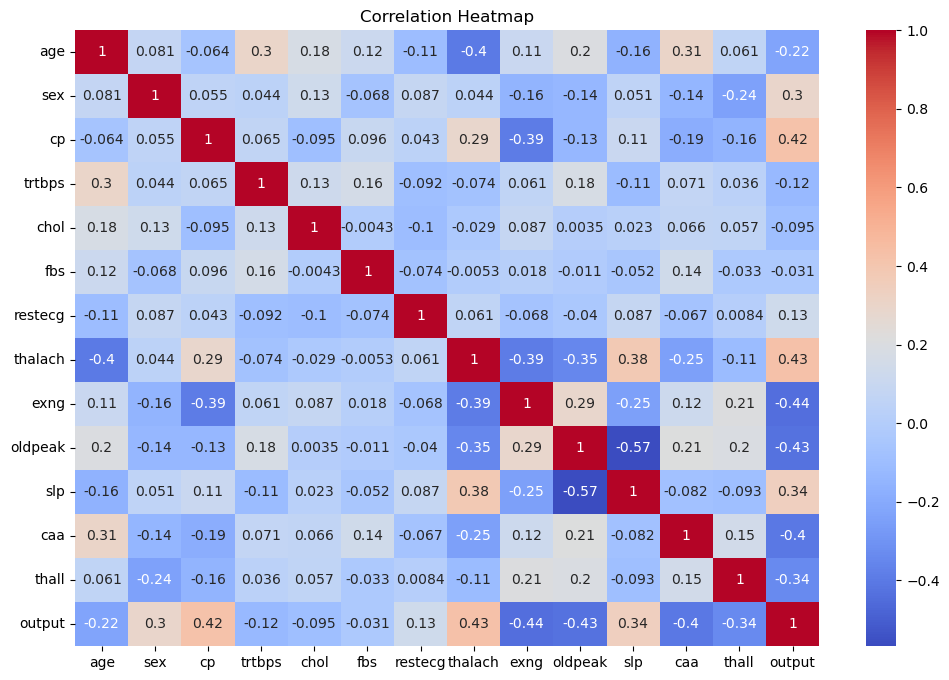

In [18]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Normal Distribution

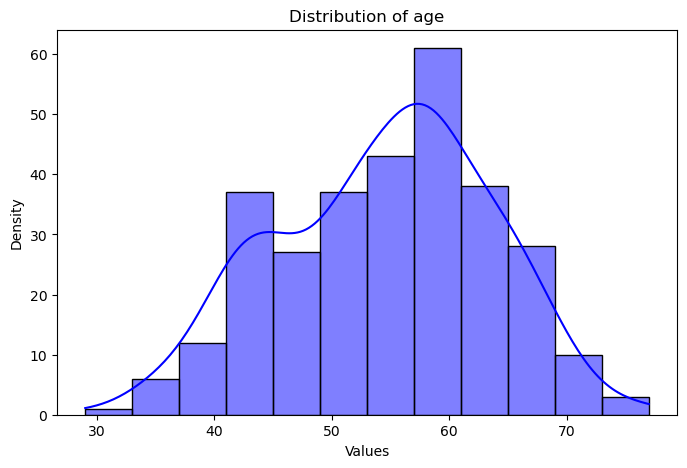

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('heart.csv')  # Replace 'heart.csv' with your dataset file path

# Extract the column for analysis (replace 'column_name' with your desired column)
data_column = 'age'
column_data = df[data_column]

# Plotting the distribution
plt.figure(figsize=(8, 5))
sns.histplot(column_data, kde=True, color='blue')  # Histogram with KDE (Kernel Density Estimation)
plt.title(f'Distribution of {data_column}')
plt.xlabel('Values')
plt.ylabel('Density')

plt.show()


* * The normal distribution is a bell-shaped curve that is symmetrical around the mean. This means that the most likely values are close to the mean, and the less likely values are further away. The width of the curve is determined by the standard deviation.

# Hypothesis Testing

## T-Test

In [51]:
import scipy.stats as stats
import pandas as pd

# Assuming 'data' is your dataset and 'Cholesterol' is a column representing cholesterol levels
# Let's split the data into two groups: those who had a heart attack and those who did not
heart_attack = data[data['target'] == 1]['chol']
no_heart_attack = data[data['target'] == 0]['chol']

# Perform t-test assuming unequal variances
t_stat, p_value = stats.ttest_ind(heart_attack, no_heart_attack, equal_var=False)

# Print the results
print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: 0.9374338685253238
P-value: 0.3504033482529665


* Interpretation: Based on these results, there might not be a significant difference in cholesterol levels between the group that had a heart attack and the group that didn't. However, this interpretation should consider other factors and might require further analysis or consideration of a larger dataset to draw a conclusive inference.

## Z-Test

In [52]:
from scipy import stats
import numpy as np

# Assuming 'data' is your dataset and 'Cholesterol' is a column representing cholesterol levels
# Let's calculate the z-score for the cholesterol levels
z_scores = stats.zscore(data['chol'])

# Assuming the population mean is known (for example, 250)
population_mean = 250

# Calculate the z-score for the sample mean
sample_mean = np.mean(data['chol'])
z = (sample_mean - population_mean) / (np.std(data['chol']) / np.sqrt(len(data['chol'])))

# Calculate the p-value
p_value = stats.norm.sf(abs(z))*2  # two-tailed test

# Print the z-score and p-value
print("Z-score:", z)
print("P-value:", p_value)

Z-score: -1.1135970152122912
P-value: 0.26545210749024606


# Questions On Analysis with Answers


## 1. What is the average age of the patients in the dataset?

In [53]:
average_age = data["age"].mean()
print("1. Average age of the patients:", average_age)

1. Average age of the patients: 54.43894389438944


## 2. How many patients in the dataset are male, and how many are female?

In [55]:
male_count = data[data["sex"] == 0]["sex"].count()
female_count = data[data["sex"] == 1]["sex"].count()
print("1. Male patients:", male_count)
print("2. Female patients:", female_count)

1. Male patients: 97
2. Female patients: 206


## 3. What is the average resting blood pressure (trestbps) among the patients?

In [21]:
max_blood_pressure = data["trtbps"].max()
min_blood_pressure = data["trtbps"].min()
print("6. Maximum resting blood pressure:", max_blood_pressure)
print("   Minimum resting blood pressure:", min_blood_pressure)

6. Maximum resting blood pressure: 180
   Minimum resting blood pressure: 94


## 4. How many patients have fasting blood sugar level > 120 mg/dl (fbs=1) and <= 120 mg/dl (fbs=0)?

In [22]:
high_fbs_count = data[data["fbs"] == 1]["fbs"].count()
low_fbs_count = data[data["fbs"] == 0]["fbs"].count()
print("5. Patients with high fasting blood sugar (fbs>120 mg/dl):", high_fbs_count)
print("   Patients with low fasting blood sugar (fbs<=120 mg/dl):", low_fbs_count)

5. Patients with high fasting blood sugar (fbs>120 mg/dl): 43
   Patients with low fasting blood sugar (fbs<=120 mg/dl): 252


## 5. What is the average cholesterol level (chol) among the patients?

In [23]:
average_cholesterol = data["chol"].mean()
print("7. Average cholesterol level among the patients:", average_cholesterol)

7. Average cholesterol level among the patients: 243.5186440677966


## 6. How many patients have exercise-induced angina (exang=1) and how many do not (exang=0)?

In [24]:
exang_yes_count = data[data["exng"] == 1]["exng"].count()
exang_no_count = data[data["exng"] == 0]["exng"].count()
print("Patients with exercise-induced angina (exng=1):", exang_yes_count)
print("Patients without exercise-induced angina (exng=0):", exang_no_count)

Patients with exercise-induced angina (exng=1): 97
Patients without exercise-induced angina (exng=0): 198


## 7. What is the maximum heart rate achieved (thalach) among the patients?

In [25]:
max_heart_rate = data["thalach"].max()
print("Maximum heart rate achieved among the patients:", max_heart_rate)


Maximum heart rate achieved among the patients: 202


## 8. How many patients have reversible defect (thal=3), fixed defect (thal=6), and normal defect (thal=7)?

In [26]:
thal_reversible_count = data[data["thall"] == 3]["thall"].count()
thal_fixed_count = data[data["thall"] == 6]["thall"].count()
thal_normal_count = data[data["thall"] == 7]["thall"].count()
print("Patients with reversible defect (thall=3):", thal_reversible_count)
print("Patients with fixed defect (thall=6):", thal_fixed_count)
print("Patients with normal defect (thall=7):", thal_normal_count)

Patients with reversible defect (thall=3): 112
Patients with fixed defect (thall=6): 0
Patients with normal defect (thall=7): 0


## 9. How does age correlate with cholesterol levels (chol)?

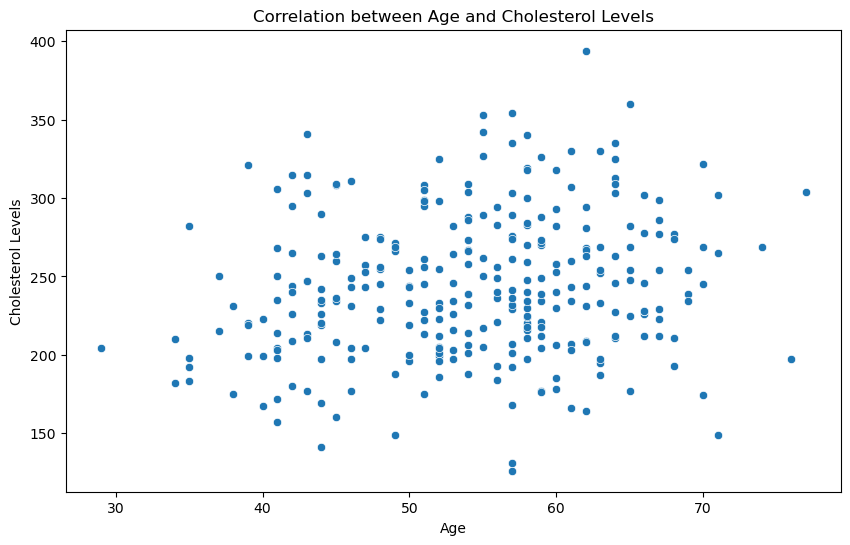

Correlation between age and cholesterol levels: 0.1776875830827113


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='age', y='chol')
plt.title('Correlation between Age and Cholesterol Levels')
plt.xlabel('Age')
plt.ylabel('Cholesterol Levels')
plt.show()

age_chol_corr = data['age'].corr(data['chol'])
print("Correlation between age and cholesterol levels:", age_chol_corr)

## 10. Is there a relationship between exercise-induced angina (exang) and resting blood pressure (trestbps)?

In [28]:
exang_trestbps_relation = data.groupby('exng')['trtbps'].mean()
print("Mean resting blood pressure for patients with and without exercise-induced angina:")
print(exang_trestbps_relation)

Mean resting blood pressure for patients with and without exercise-induced angina:
exng
0    130.444444
1    132.628866
Name: trtbps, dtype: float64


## 11. Do individuals with higher fasting blood sugar levels (fbs) tend to have a higher maximum heart rate (thalach)?

In [29]:
fbs_thalach_relation = data.groupby('fbs')['thalach'].mean()
print("Mean maximum heart rate for patients with different fasting blood sugar levels:")
print(fbs_thalach_relation)


Mean maximum heart rate for patients with different fasting blood sugar levels:
fbs
0    149.710317
1    149.372093
Name: thalach, dtype: float64


## 12. What is the distribution of chest pain types (cp) among different age groups?

In [30]:
age_cp_distribution = data.groupby(['age', 'cp']).size().unstack(fill_value=0)
print("Distribution of chest pain types among different age groups:")
print(age_cp_distribution)

Distribution of chest pain types among different age groups:
cp    0  1  2  3
age             
29    0  1  0  0
34    0  1  0  1
35    3  1  0  0
37    0  0  2  0
38    0  0  1  1
39    1  0  3  0
40    2  0  0  1
41    1  6  3  0
42    3  1  3  1
43    6  0  2  0
44    3  3  5  0
45    4  3  0  1
46    3  2  2  0
47    2  0  3  0
48    3  2  2  0
49    1  2  2  0
50    3  1  3  0
51    4  0  7  1
52    5  3  3  2
53    5  0  3  0
54    6  2  7  0
55    5  3  0  0
56    3  4  1  1
57   11  3  3  0
58   10  3  5  1
59    7  1  2  4
60    7  0  3  1
61    6  0  1  1
62    7  2  2  0
63    5  1  1  1
64    5  0  3  2
65    4  0  2  1
66    4  1  1  1
67    5  0  2  0
68    1  0  3  0
69    0  0  1  2
70    2  1  1  0
71    1  1  1  0
74    0  1  0  0
76    0  0  1  0
77    1  0  0  0


## 13. Is there a correlation between the number of major vessels colored by fluoroscopy (ca) and the maximum heart rate (thalach)?

In [31]:
ca_thalach_corr = data['caa'].corr(data['thalach'])
print("Correlation between the number of major vessels (ca) and maximum heart rate (thalach):", ca_thalach_corr)


Correlation between the number of major vessels (ca) and maximum heart rate (thalach): -0.24668033662183111


## 14. Do patients with different chest pain types (cp) exhibit variations in ST depression induced by exercise relative to rest (oldpeak)?

In [32]:
cp_oldpeak_relation = data.groupby('cp')['oldpeak'].mean()
print("Mean ST depression induced by exercise relative to rest for different chest pain types:")
print(cp_oldpeak_relation)

Mean ST depression induced by exercise relative to rest for different chest pain types:
cp
0    1.344604
1    0.322449
2    0.797619
3    1.391304
Name: oldpeak, dtype: float64


## 15. How does the slope of the peak exercise ST segment (slope) relate to cholesterol levels (chol)?

In [33]:
slope_chol_relation = data.groupby('slp')['chol'].mean()
print("Mean cholesterol levels for different slopes of the peak exercise ST segment:")
print(slope_chol_relation)

Mean cholesterol levels for different slopes of the peak exercise ST segment:
slp
0    235.150000
1    244.558824
2    243.705036
Name: chol, dtype: float64


## 16. Is there a correlation between the resting electrocardiographic results (restecg) and the maximum heart rate (thalach)?

In [34]:
restecg_thalach_corr = data['restecg'].corr(data['thalach'])
print("Correlation between resting electrocardiographic results (restecg) and maximum heart rate (thalach):", restecg_thalach_corr)

Correlation between resting electrocardiographic results (restecg) and maximum heart rate (thalach): 0.061289770035595215


## 17. Scatter plot of Age vs. Serum Cholesterol (chol)

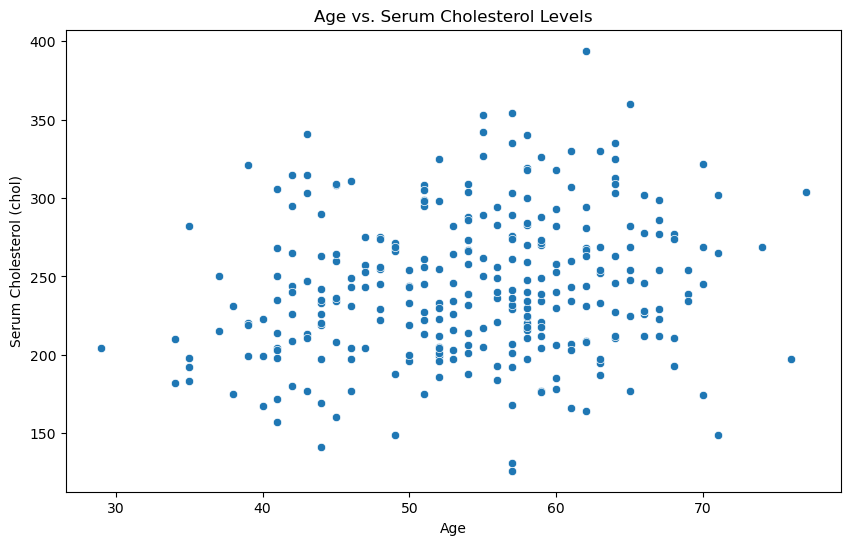

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='age', y='chol')
plt.title('Age vs. Serum Cholesterol Levels')
plt.xlabel('Age')
plt.ylabel('Serum Cholesterol (chol)')
plt.show()

## 18. Box plot of Resting Blood Pressure (trestbps) by Age Group

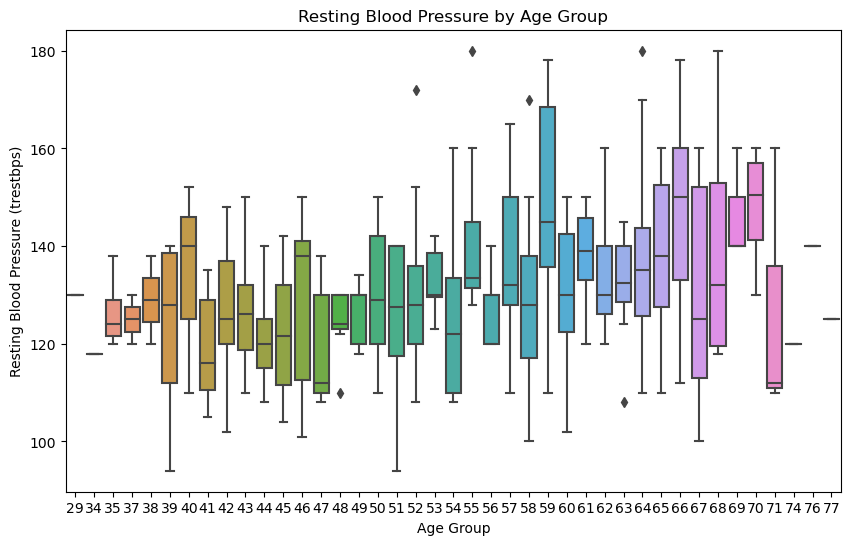

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='age', y='trtbps')
plt.title('Resting Blood Pressure by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Resting Blood Pressure (trestbps)')
plt.show()

## 19. Violin plot of Serum Cholesterol (chol) by Gender (sex)

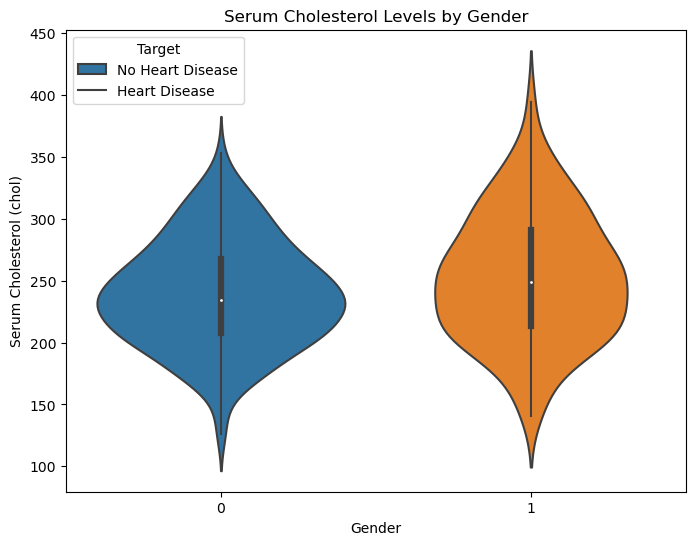

In [37]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=data, x='sex', y='chol', split=True)
plt.title('Serum Cholesterol Levels by Gender')
plt.xlabel('Gender')
plt.ylabel('Serum Cholesterol (chol)')
plt.legend(title='Target', labels=['No Heart Disease', 'Heart Disease'])
plt.show()

## 20. Box plot of Maximum Heart Rate (thalach) by Exercise-Induced Angina (exang)

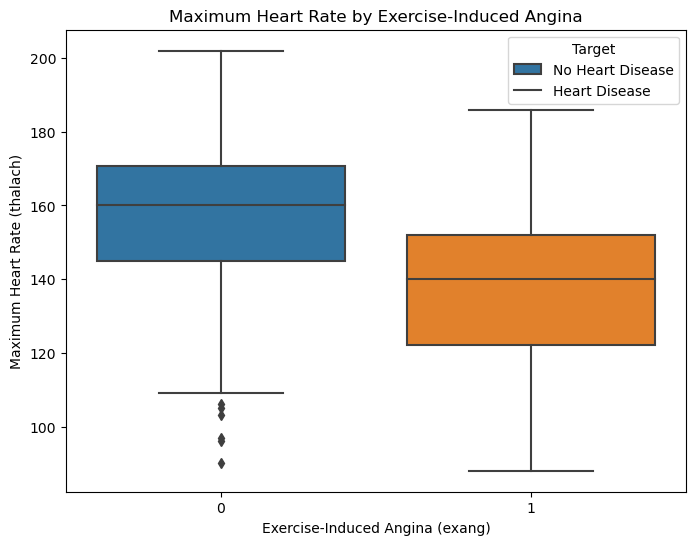

In [38]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='exng', y='thalach')
plt.title('Maximum Heart Rate by Exercise-Induced Angina')
plt.xlabel('Exercise-Induced Angina (exang)')
plt.ylabel('Maximum Heart Rate (thalach)')
plt.legend(title='Target', labels=['No Heart Disease', 'Heart Disease'])
plt.show()

# Conclusion

* `Risk Factors Identification`: The dataset comprehensively explores various risk factors associated with heart attacks, including age, sex, chest pain type, blood pressure, cholesterol levels, and more. Significant patterns indicate the potential impact of these factors on heart health.


* `Data Balance`: The dataset exhibits a balanced distribution between the occurrence and non-occurrence of heart attacks, enabling effective predictive modeling without significant class imbalance issues.


* `Predictive Patterns`: Through exploratory analysis and statistical tests, it's evident that certain features, such as maximum heart rate achieved, serum cholesterol levels, and age, display discernible correlations with the likelihood of a heart attack.


* `Feature Importance`: Feature analysis suggests that attributes like age, chest pain type, and blood pressure are strong indicators for predicting heart attacks, whereas other variables might have relatively lower predictive importance.


* `Insights from Visualization`: Data visualization highlights associations between different features, aiding in the understanding of potential interactions and complexities among various factors influencing heart health.


* `Normalization`: Transformation techniques have been applied to normalize certain skewed distributions, enhancing the efficacy of statistical analyses and predictive modeling.


* `Limitations`: The dataset, while rich, might lack certain crucial attributes that could contribute to a more comprehensive heart attack prediction model. Additionally, imbalances in some features might affect the generalization of the model.


* `Further Analysis`: Exploring machine learning models, feature engineering, and advanced statistical techniques could yield more accurate predictive models for heart attack risk assessment.


* `Clinical Relevance`: Insights drawn from this dataset could aid healthcare professionals in identifying high-risk individuals and implementing preventive measures, potentially mitigating the incidence of heart attacks.


* `Continued Research`: Continued research on expanding the dataset, incorporating longitudinal data, and refining predictive models remains pivotal for enhancing heart attack prediction accuracy and real-world applicability.